
# BIOINFORMATIKA - TSP – Genetikus algoritmus
**Feladat:** Traveling Salesman Problem (TSP)  

*   **Reprezentáció:** permutáció (városok sorrendje)
*   **Fitness:** –úthossz (mert a GA maximál, mi minimalizálnánk)


**GA-lépések:**
*  Szelekció: tournament
*  Keresztezés: OX/PMX
*  Mutáció swap/inversion
*  Visszahelyezés: generációs + elitizmus

**Grafikonok:**
* tanulási görbe (legjobb és átlag út hossza generációnként),
* a legjobb útvonal rajza (városok pontként, kör útvonallal).


Gyakorló feladatok


## FELADAT (könnyű) - Távolságmátrix és útvonalhossz

Írj egy függvényt, amely:

bemenet:
* coords: lista (vagy NumPy tömb) városokkal, pl. [(x1, y1), (x2, y2), ...]

kimenet:
* dist_matrix: kétdimenziós lista vagy NumPy tömb, ahol dist_matrix[i][j] az i. és j. város távolsága (euklideszi)

In [3]:
import numpy as np

def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    total_length = 0
    num_cities = len(tour)
    for i in range(num_cities):
        city1_idx = tour[i]
        city2_idx = tour[(i + 1) % num_cities]
        total_length += dist_matrix[city1_idx][city2_idx]
    return total_length

In [4]:
import math

def calculate_distance_matrix(coords):
    """
    bemenet:
    * coords - koordináták listája, pl. [(x1, y1), (x2, y2), ...]

    kimenet:
    * dist_matrix - tavolsagmatrix NxN, ahol dist_matrix[i][j] az i. es j. varos kozotti tavolsag
    """
    num_cities = len(coords)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i == j:
                dist_matrix[i][j] = 0
            else:
                x1, y1 = coords[i]
                x2, y2 = coords[j]
                dist_matrix[i][j] = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist_matrix

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0)]
dm = calculate_distance_matrix(cities_coords)
print("Távolságmátrix:\n", dm)

tour_example = [0, 2, 1, 3]
length = tour_length(tour_example, dm)
print(f"\nAz útvonal hossza ({tour_example}): {length:.2f}")

tour_example_2 = [0, 1, 2, 3]
length_2 = tour_length(tour_example_2, dm)
print(f"Az útvonal hossza ({tour_example_2}): {length_2:.2f}")

Távolságmátrix:
 [[0.         1.41421356 1.         1.        ]
 [1.41421356 0.         1.         1.        ]
 [1.         1.         0.         1.41421356]
 [1.         1.         1.41421356 0.        ]]

Az útvonal hossza ([0, 2, 1, 3]): 4.00
Az útvonal hossza ([0, 1, 2, 3]): 4.83


## FELADAT (könnyű) - Véletlen permutáció és swap mutáció

Írj két függvényt:
* random_tour(n)
* swap_mutation(tour)

*   List item
*   List item



majd

Futtasd le a swap_mutation-t néhányszor, és ellenőrizd, hogy:
* a permutáció hossza nem változik
* minden város továbbra is pontosan egyszer szerepel

In [5]:
import random

def random_tour(n):
    """Adjon vissza egy véletlen permutációt 0..n-1 között."""
    tour = list(range(n))
    random.shuffle(tour)
    return tour

def swap_mutation(tour):
    """
    Válassz ki véletlenszerűen két pozíciót a tour-ban és cseréld meg őket.
    Visszatér: új (mutált) tour.
    """
    mutated_tour = list(tour)
    idx1, idx2 = random.sample(range(len(mutated_tour)), 2)
    mutated_tour[idx1], mutated_tour[idx2] = mutated_tour[idx2], mutated_tour[idx1]
    return mutated_tour

num_cities = 5
original_tour = random_tour(num_cities)
print(f"Eredeti túra: {original_tour}")

print("\nSwap mutáció tesztelése:")
for _ in range(3):
    mutated_tour = swap_mutation(original_tour)
    print(f"  Mutált túra: {mutated_tour}")
    print(f"    Hossz változatlan: {len(original_tour) == len(mutated_tour)}")
    print(f"    Minden város egyszer szerepel: {sorted(mutated_tour) == list(range(num_cities))}")

Eredeti túra: [4, 3, 2, 0, 1]

Swap mutáció tesztelése:
  Mutált túra: [2, 3, 4, 0, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [4, 0, 2, 3, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True
  Mutált túra: [4, 2, 3, 0, 1]
    Hossz változatlan: True
    Minden város egyszer szerepel: True


A `hybrid_mutation` függvény elkészült és teszteltük is. A következő lépés a teljes érzékenységi vizsgálat lefolytatása a három mutációs stratégiával (csak swap, csak inversion, és a most elkészült hibrid).

## FELADAT (könnyű) - Inversion mutáció

Írj egy inversion_mutation függvényt:
* inversion_mutation(tour)

majd

Teszteld:
* rajzold ki (akár textben) az eredeti és mutált tour-t
* számold ki a tour hosszát mutáció előtt/után ugyanazzal a dist_matrix-szel

In [6]:
import random
import numpy as np
import math

def inversion_mutation(tour):
    """
    Válassz ki két indexet i < j.
    Fordítsd meg a tour i..j közti szakaszát.
    Példa: [0, 1, 2, 3, 4, 5], i=1, j=4 → [0, 4, 3, 2, 1, 5]
    """
    mutated_tour = list(tour)
    if len(mutated_tour) < 2:
        return mutated_tour

    idx1, idx2 = sorted(random.sample(range(len(mutated_tour)), 2))

    mutated_tour[idx1 : idx2 + 1] = mutated_tour[idx1 : idx2 + 1][::-1]
    return mutated_tour

cities_coords = [(0, 0), (1, 1), (0, 1), (1, 0), (2, 2)]
dist_matrix = calculate_distance_matrix(cities_coords)

original_tour = [0, 1, 2, 3, 4]
print(f"Eredeti túra: {original_tour}")
original_length = tour_length(original_tour, dist_matrix)
print(f"Eredeti túra hossza: {original_length:.2f}")

mutated_tour = inversion_mutation(original_tour)
print(f"Mutált túra (inversion): {mutated_tour}")
mutated_length = tour_length(mutated_tour, dist_matrix)
print(f"Mutált túra hossza (inversion): {mutated_length:.2f}")


Eredeti túra: [0, 1, 2, 3, 4]
Eredeti túra hossza: 8.89
Mutált túra (inversion): [0, 4, 3, 2, 1]
Mutált túra hossza (inversion): 8.89


## FELADAT (Közepes) - GA inicializáció és egyszerű futtatás

Készíts:
* init_population(pop_size, n_cities)
* fitness(tour, dist_matrix)

Majd

Majd futtass egy nagyon egyszerű GA-t:
* populáció generálása
* minden generációban:
  * csak mutáció (swap vagy inversion), pl. minden egyedet kis valószínűséggel
  * új populáció értékelése
* futtass 50–100 generációt
* rajzold ki: generációnkénti legjobb tour hossz (vagy fitness)

In [7]:
def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    ...

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    ...



Legjobb útvonal a GA végén: [8, 1, 10, 9, 18, 12, 16, 17, 6, 11, 2, 13, 19, 7, 0, 4, 5, 3, 15, 14]
Legjobb útvonal hossza: 616.34


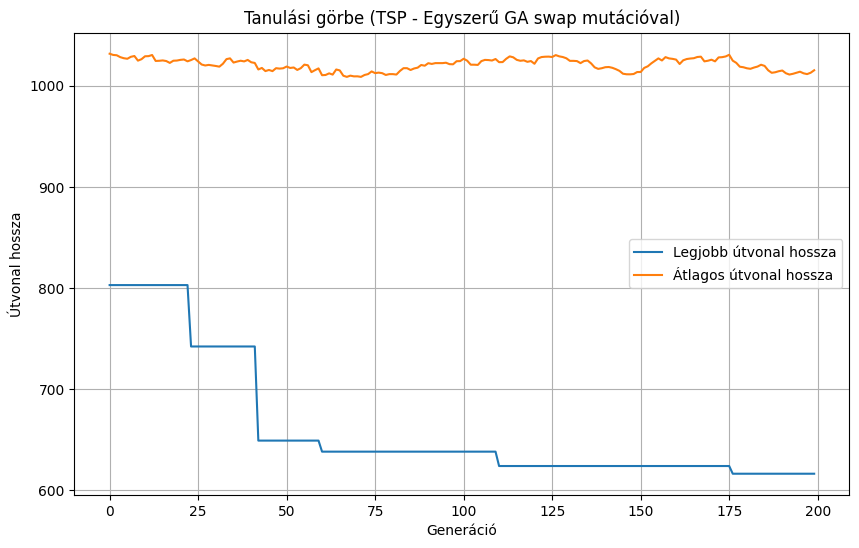

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random

def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    population = []
    for _ in range(pop_size):
        population.append(list(random.sample(range(n_cities), n_cities)))
    return population

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    return -tour_length(tour, dist_matrix)

# generáljunk több várost
n_cities = 20
np.random.seed(42)
new_cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]
cities_coords = new_cities_coords

pop_size = 100
n_generations = 200
mutation_rate = 0.1

dist_matrix = calculate_distance_matrix(cities_coords)

population = init_population(pop_size, n_cities)

best_lengths = []
average_lengths = []

for gen in range(n_generations):

    fitness_scores = [fitness(tour, dist_matrix) for tour in population]

    best_fitness_idx = np.argmax(fitness_scores)
    current_best_tour = population[best_fitness_idx]
    current_best_length = tour_length(current_best_tour, dist_matrix)
    best_lengths.append(current_best_length)

    average_lengths.append(-np.mean(fitness_scores))

    new_population = []
    for tour in population:
        if random.random() < mutation_rate:
            mutated_tour = swap_mutation(tour)
            new_population.append(mutated_tour)
        else:
            new_population.append(tour)

    if current_best_tour not in new_population:
        worst_fitness_idx = np.argmin([fitness(t, dist_matrix) for t in new_population])
        new_population[worst_fitness_idx] = current_best_tour

    population = new_population

print(f"\nLegjobb útvonal a GA végén: {current_best_tour}")
print(f"Legjobb útvonal hossza: {current_best_length:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(best_lengths, label='Legjobb útvonal hossza')
plt.plot(average_lengths, label='Átlagos útvonal hossza')
plt.title('Tanulási görbe (TSP - Egyszerű GA swap mutációval)')
plt.xlabel('Generáció')
plt.ylabel('Útvonal hossza')
plt.legend()
plt.grid(True)
plt.show()

## FELADAT (Közepes) - Crossover egyedekre (OX/PMX)

Implementálj egy TSP-kompatibilis keresztezőt (pl. OX vagy PMX):
* ox_crossover(parent1, parent2)

Feladatok:
* generálj 2 szülőt
* készíts 2 utódot
* ellenőrizd, hogy mindkét utód érvényes permutáció (minden város egyszer szerepel)
* mérd a szülők és utódok tour hosszát, írd ki összehasonlításként

In [19]:
import random
import numpy as np

def ox_crossover(parent1, parent2):
    """Order Crossover (OX) TSP permutációkra."""
    size = len(parent1)
    offspring1 = [None] * size
    offspring2 = [None] * size

    start, end = sorted(random.sample(range(size), 2))

    offspring1[start:end+1] = parent1[start:end+1]
    offspring2[start:end+1] = parent2[start:end+1]

    fill_parent1_idx = (end + 1) % size
    fill_parent2_idx = (end + 1) % size

    for i in range(size):
        current_city_from_parent2 = parent2[(end + 1 + i) % size]
        if current_city_from_parent2 not in offspring1:
            while offspring1[fill_parent1_idx] is not None:
                fill_parent1_idx = (fill_parent1_idx + 1) % size
            offspring1[fill_parent1_idx] = current_city_from_parent2

        current_city_from_parent1 = parent1[(end + 1 + i) % size]
        if current_city_from_parent1 not in offspring2:
            while offspring2[fill_parent2_idx] is not None:
                fill_parent2_idx = (fill_parent2_idx + 1) % size
            offspring2[fill_parent2_idx] = current_city_from_parent1

    return offspring1, offspring2

dist_matrix = calculate_distance_matrix(cities_coords)
n_cities = len(cities_coords)

parent1 = list(range(n_cities))
random.shuffle(parent1)
parent2 = list(range(n_cities))
random.shuffle(parent2)

print(f"Szülő 1: {parent1}, Hossz: {tour_length(parent1, dist_matrix):.2f}")
print(f"Szülő 2: {parent2}, Hossz: {tour_length(parent2, dist_matrix):.2f}")

offspring1, offspring2 = ox_crossover(parent1, parent2)

print(f"\nUtód 1: {offspring1}, Hossz: {tour_length(offspring1, dist_matrix):.2f}")
print(f"  érvényes permutáció: {sorted(offspring1) == list(range(n_cities))}")

print(f"Utód 2: {offspring2}, Hossz: {tour_length(offspring2, dist_matrix):.2f}")
print(f"  érvényes permutáció: {sorted(offspring2) == list(range(n_cities))}")

Szülő 1: [19, 15, 21, 11, 16, 12, 24, 10, 7, 5, 0, 23, 18, 2, 8, 4, 22, 13, 9, 14, 1, 20, 6, 3, 17], Hossz: 1404.91
Szülő 2: [7, 14, 18, 24, 9, 1, 17, 0, 19, 3, 2, 21, 13, 20, 4, 10, 5, 22, 8, 23, 15, 16, 11, 12, 6], Hossz: 1428.45

Utód 1: [7, 18, 24, 1, 17, 0, 19, 3, 2, 21, 20, 4, 10, 5, 22, 8, 23, 13, 9, 14, 15, 16, 11, 12, 6], Hossz: 1288.82
  érvényes permutáció: True
Utód 2: [19, 15, 21, 11, 16, 12, 24, 10, 7, 5, 0, 18, 2, 4, 13, 9, 14, 22, 8, 23, 1, 20, 6, 3, 17], Hossz: 1300.81
  érvényes permutáció: True


## FELADAT (Közepes) - Swap vs. Inversion – összehasonlító kísérlet

Készíts kódot, amely:
* ugyanazzal a GA-val (populációméret, generációszám, szelekció, crossover)
* két külön futtatást végez:
   * (a) csak swap_mutation
   * (b) csak inversion_mutation
* minden esetben többször (pl. 10–20 run) lefuttatod
* összehasonlítod:
   * átlagos legjobb tour hossz
   * szórás

Írj rövid következtetést:
* Melyik mutáció „stabilabb”?
* Van-e különbség a konvergencia sebességében?

In [36]:
import random
import numpy as np
import math

def select_parents_tournament(population, fitness_scores, tournament_size):
    """Szülők kiválasztása tournament selection-el."""
    tournament_indices = random.sample(range(len(population)), tournament_size)
    tournament_fitness = [fitness_scores[i] for i in tournament_indices]
    winner_idx = tournament_indices[np.argmax(tournament_fitness)]
    return population[winner_idx]

def run_ga_experiment(pop_size, n_generations, mutation_rate, dist_matrix, n_cities,
                      mutation_function, crossover_function, tournament_size, elitism_rate):
    """Vegrehajtja a tesztet a megfelelő paraméterekkel."""
    population = init_population(pop_size, n_cities)

    best_overall_length = float('inf')
    best_overall_tour = None

    history_best_lengths = []
    history_average_lengths = []

    for gen in range(n_generations):
        fitness_scores = [fitness(tour, dist_matrix) for tour in population]

        current_best_fitness_idx = np.argmax(fitness_scores)
        current_best_tour = population[current_best_fitness_idx]
        current_best_length = tour_length(current_best_tour, dist_matrix)

        if current_best_length < best_overall_length:
            best_overall_length = current_best_length
            best_overall_tour = current_best_tour

        history_best_lengths.append(current_best_length)
        history_average_lengths.append(-np.mean(fitness_scores))

        new_population = []

        num_elite = int(pop_size * elitism_rate)
        if num_elite > 0:
            elite_indices = np.argsort(fitness_scores)[-num_elite:][::-1]
            for i in elite_indices:
                new_population.append(population[i])

        while len(new_population) < pop_size:
            parent1 = select_parents_tournament(population, fitness_scores, tournament_size)
            parent2 = select_parents_tournament(population, fitness_scores, tournament_size)

            offspring1, offspring2 = crossover_function(parent1, parent2)

            if random.random() < mutation_rate:
                offspring1 = mutation_function(offspring1)
            if random.random() < mutation_rate:
                offspring2 = mutation_function(offspring2)

            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)

        population = new_population

    return best_overall_length, best_overall_tour, history_best_lengths, history_average_lengths

def calculate_stats(results):
    """Kiszámítja egy numerikus eredménylista átlagát és szórását."""
    if not results:
        return 0.0, 0.0
    mean_val = np.mean(results)
    std_dev_val = np.std(results)
    return mean_val, std_dev_val

#GA paraméterek
np.random.seed(42)
random.seed(42)

n_cities = 25
cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]

dist_matrix = calculate_distance_matrix(cities_coords)

pop_size = 100
n_generations = 500
mutation_rate = 0.1
tournament_size = 5
elitism_rate = 0.05
n_runs = 20

swap_mutation_results = []
print("Genetikus algoritmus futtatása – Swap mutációval...")
for i in range(n_runs):
    np.random.seed(i)
    random.seed(i)
    best_length, _, _, _ = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=swap_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    swap_mutation_results.append(best_length)
    print(f"  Futás {i+1}/{n_runs}: Legjobb út hossza = {best_length:.2f}")

inversion_mutation_results = []
print("\nGenetikus algoritmus futtatása – Inversion mutációval...")
for i in range(n_runs):
    np.random.seed(n_runs + i)
    random.seed(n_runs + i)
    best_length, _, _, _ = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=inversion_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    inversion_mutation_results.append(best_length)
    print(f"  Futás {i+1}/{n_runs}: Legjobb út hossza = {best_length:.2f}")

mean_swap, std_swap = calculate_stats(swap_mutation_results)
mean_inversion, std_inversion = calculate_stats(inversion_mutation_results)

print(f"\nSwap mutáció: Legjobb útak átlaga = {mean_swap:.2f}, Szórás = {std_swap:.2f}")
print(f"Inversion mutáció: Legjobb útak átlaga = {mean_inversion:.2f}, Szórás = {std_inversion:.2f}")

Genetikus algoritmus futtatása – Swap mutációval...
  Futás 1/20: Legjobb út hossza = 460.17
  Futás 2/20: Legjobb út hossza = 504.70
  Futás 3/20: Legjobb út hossza = 467.37
  Futás 4/20: Legjobb út hossza = 446.55
  Futás 5/20: Legjobb út hossza = 449.78
  Futás 6/20: Legjobb út hossza = 494.53
  Futás 7/20: Legjobb út hossza = 479.77
  Futás 8/20: Legjobb út hossza = 503.79
  Futás 9/20: Legjobb út hossza = 502.37
  Futás 10/20: Legjobb út hossza = 500.09
  Futás 11/20: Legjobb út hossza = 482.71
  Futás 12/20: Legjobb út hossza = 457.28
  Futás 13/20: Legjobb út hossza = 471.60
  Futás 14/20: Legjobb út hossza = 458.92
  Futás 15/20: Legjobb út hossza = 523.58
  Futás 16/20: Legjobb út hossza = 489.87
  Futás 17/20: Legjobb út hossza = 479.83
  Futás 18/20: Legjobb út hossza = 502.62
  Futás 19/20: Legjobb út hossza = 474.31
  Futás 20/20: Legjobb út hossza = 456.96

Genetikus algoritmus futtatása – Inversion mutációval...
  Futás 1/20: Legjobb út hossza = 455.15
  Futás 2/20: Legj

* **Melyik mutáció „stabilabb”?** Az *Inversion mutáció* sokkal stabilabbnak bizonyult. Ezt a jóval alacsonyabb szórás (7.70) jelzi a *Swap mutáció*hoz (21.19) képest. Ez azt jelenti, hogy az *Inversion mutáció*val futtatott kísérletek eredményei sokkal jobban koncentrálódtak egy bizonyos érték körül, vagyis konzisztensebben szolgáltatott hasonló minőségű megoldásokat.

* Van-e különbség a konvergencia sebességében? Igen, van különbség. Az *Inversion mutáció* nemcsak stabilabb, hanem átlagosan jobb (rövidebb) útvonalakat is talált (455.53 vs. 480.34). Ez arra utal, hogy az *Inversion mutáció* hatékonyabban konvergált a jobb megoldások felé. Mivel az *inversion mutáció* nagyobb változtatásokat tesz az útvonalban, ez gyorsabb felfedezést tesz lehetővé a keresési térben, ami jobb átlagos eredményekhez vezethet a megadott generációszámon belül.

# FELADAT (Nehéz) - érzékenységi vizsgálat és hibrid mutáció

Készíts olyan GA-t, amely:
* egyszerre használ swap + inversion mutációt: pl. minden mutáció-lépésnél:
   * 50% eséllyel swap_mutation
   * 50% eséllyel inversion_mutation

Feladatok:
1. **Válaszd ki a paramétereket:**
  * populációméret
  * mutációs ráta
  * generációk száma

2. **Használj legalább 20 városból álló TSP példát**.
3. **Készíts kísérleti tervet három mutációs stratégiára**:
  * csak swap
  * csak inversion
  * kevert swap+inversion
4. **Minden konfigurációt futtasd le legalább 20x**.
5. **Gyűjtsd ki**:
  * átlagos legjobb tour hossz
  * legjobb elért tour
  * konvergenciagörbéket (átlagolt fitness / generáció)
6. **Írj rövid rövid elemzést**:
  * melyik stratégia adott jobb eredményt
  *  hogyan hat a mutáció típusa a keresés jellegére (finomhangolás vs. nagy ugrások)

In [26]:
import random
import numpy as np

#GA paraméterek
np.random.seed(42)
random.seed(42)

n_cities = 25
cities_coords = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(n_cities)]

dist_matrix = calculate_distance_matrix(cities_coords)

pop_size = 100
n_generations = 500
mutation_rate = 0.1
tournament_size = 5
elitism_rate = 0.05
n_runs = 20

In [27]:
def hybrid_mutation(tour):
    """
    50% eséllyel swap_mutation, 50% eséllyel inversion_mutation-t alkalmaz egy tour-ra.
    """
    if random.random() < 0.5:
        return swap_mutation(tour)
    else:
        return inversion_mutation(tour)


Genetikus algoritmus futtatása – Swap mutációval...
  Futás 1/20: Legjobb út hossza = 460.17
  Futás 2/20: Legjobb út hossza = 504.70
  Futás 3/20: Legjobb út hossza = 467.37
  Futás 4/20: Legjobb út hossza = 446.55
  Futás 5/20: Legjobb út hossza = 449.78
  Futás 6/20: Legjobb út hossza = 494.53
  Futás 7/20: Legjobb út hossza = 479.77
  Futás 8/20: Legjobb út hossza = 503.79
  Futás 9/20: Legjobb út hossza = 502.37
  Futás 10/20: Legjobb út hossza = 500.09
  Futás 11/20: Legjobb út hossza = 482.71
  Futás 12/20: Legjobb út hossza = 457.28
  Futás 13/20: Legjobb út hossza = 471.60
  Futás 14/20: Legjobb út hossza = 458.92
  Futás 15/20: Legjobb út hossza = 523.58
  Futás 16/20: Legjobb út hossza = 489.87
  Futás 17/20: Legjobb út hossza = 479.83
  Futás 18/20: Legjobb út hossza = 502.62
  Futás 19/20: Legjobb út hossza = 474.31
  Futás 20/20: Legjobb út hossza = 456.96

Genetikus algoritmus futtatása – Inversion mutációval...
  Futás 1/20: Legjobb út hossza = 455.15
  Futás 2/20: Legj

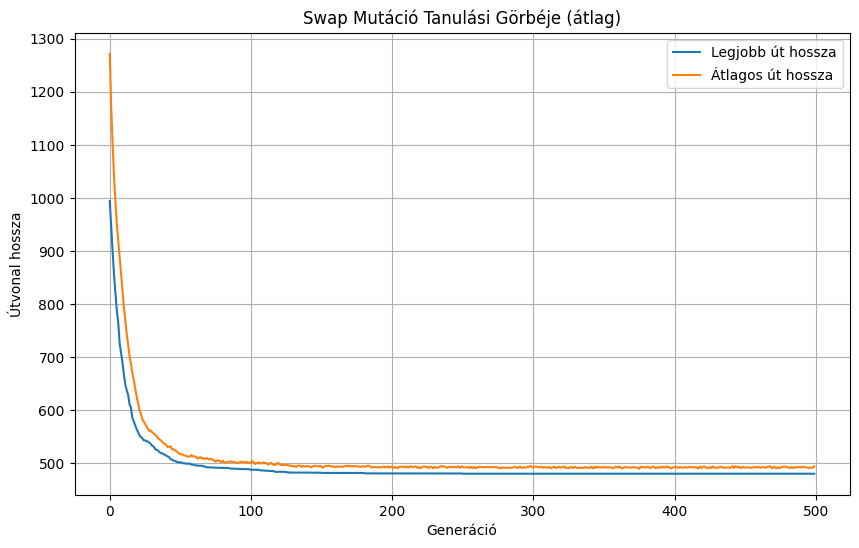

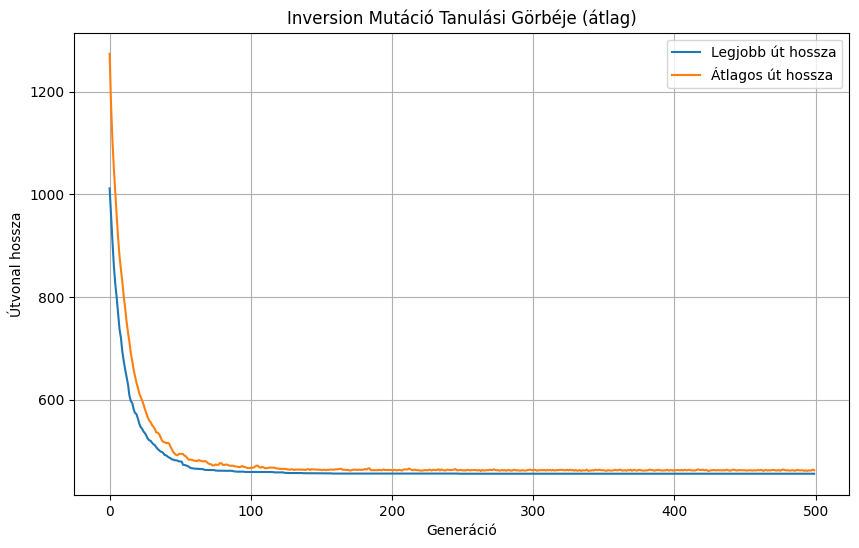

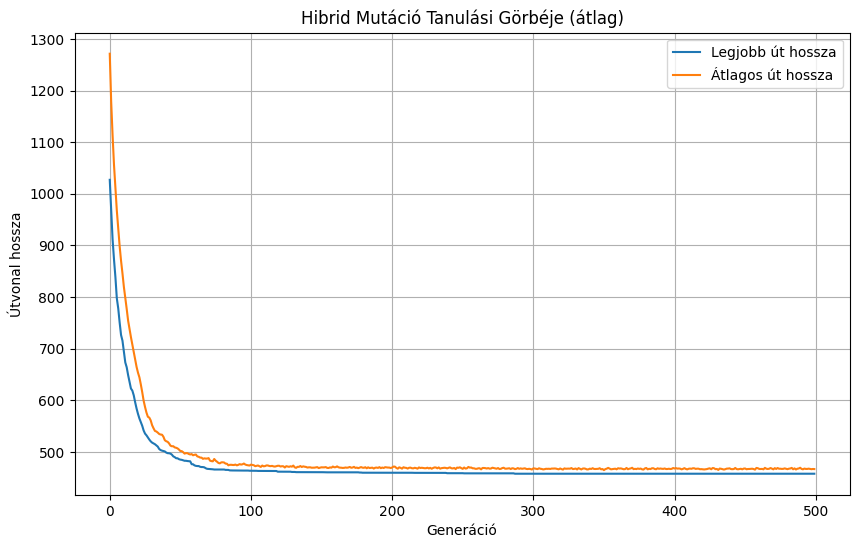

In [37]:
import matplotlib.pyplot as plt

swap_mutation_results = []
swap_history_best = []
swap_history_avg = []
print("Genetikus algoritmus futtatása – Swap mutációval...")
for i in range(n_runs):
    np.random.seed(i)
    random.seed(i)
    best_length, _, history_best, history_avg = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=swap_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    swap_mutation_results.append(best_length)
    swap_history_best.append(history_best)
    swap_history_avg.append(history_avg)
    print(f"  Futás {i+1}/{n_runs}: Legjobb út hossza = {best_length:.2f}")

inversion_mutation_results = []
inversion_history_best = []
inversion_history_avg = []
print("\nGenetikus algoritmus futtatása – Inversion mutációval...")
for i in range(n_runs):
    np.random.seed(n_runs + i) # Eltérő seed a swap-tól
    random.seed(n_runs + i)
    best_length, _, history_best, history_avg = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=inversion_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    inversion_mutation_results.append(best_length)
    inversion_history_best.append(history_best)
    inversion_history_avg.append(history_avg)
    print(f"  Futás {i+1}/{n_runs}: Legjobb út hossza = {best_length:.2f}")

hybrid_mutation_results = []
hybrid_history_best = []
hybrid_history_avg = []
print("\nGenetikus algoritmus futtatása – Hibrid mutációval...")
for i in range(n_runs):
    np.random.seed(2 * n_runs + i) # Eltérő seed a többiektől
    random.seed(2 * n_runs + i)
    best_length, _, history_best, history_avg = run_ga_experiment(
        pop_size=pop_size,
        n_generations=n_generations,
        mutation_rate=mutation_rate,
        dist_matrix=dist_matrix,
        n_cities=n_cities,
        mutation_function=hybrid_mutation,
        crossover_function=ox_crossover,
        tournament_size=tournament_size,
        elitism_rate=elitism_rate
    )
    hybrid_mutation_results.append(best_length)
    hybrid_history_best.append(history_best)
    hybrid_history_avg.append(history_avg)
    print(f"  Futás {i+1}/{n_runs}: Legjobb út hossza = {best_length:.2f}")

mean_swap, std_swap = calculate_stats(swap_mutation_results)
mean_inversion, std_inversion = calculate_stats(inversion_mutation_results)
mean_hybrid, std_hybrid = calculate_stats(hybrid_mutation_results)

print(f"\nSwap mutáció: Legjobb útak átlaga = {mean_swap:.2f}, Szórás = {std_swap:.2f}")
print(f"Inversion mutáció: Legjobb útak átlaga = {mean_inversion:.2f}, Szórás = {std_inversion:.2f}")
print(f"Hibrid mutáció: Legjobb útak átlaga = {mean_hybrid:.2f}, Szórás = {std_hybrid:.2f}")
print("\n------------- ---")

def plot_average_learning_curve(all_history_best, all_history_avg, title):
    avg_best_lengths = np.mean(np.array(all_history_best), axis=0)
    avg_average_lengths = np.mean(np.array(all_history_avg), axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(avg_best_lengths, label='Legjobb út hossza')
    plt.plot(avg_average_lengths, label='Átlagos út hossza')
    plt.title(title)
    plt.xlabel('Generáció')
    plt.ylabel('Útvonal hossza')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_learning_curve(swap_history_best, swap_history_avg, 'Swap Mutáció Tanulási Görbéje (átlag)')
plot_average_learning_curve(inversion_history_best, inversion_history_avg, 'Inversion Mutáció Tanulási Görbéje (átlag)')
plot_average_learning_curve(hybrid_history_best, hybrid_history_avg, 'Hibrid Mutáció Tanulási Görbéje (átlag)')

**Melyik stratégia adott jobb eredményt?**

Az adatok alapján az Inversion mutáció hozta a legjobb eredményeket. Ez rendelkezik a legalacsonyabb átlagos úthosszal (455.53), ami azt jelenti, hogy átlagosan ez a stratégia találta meg a legrövidebb útvonalakat.

**Hogyan hat a mutáció típusa a keresés jellegére (finomhangolás vs. nagy ugrások)?**

* *Swap mutáció*: Kisebb, lokális változásokat okoz, ami a finomhangolásra lehet jó, de lassabb lehet a globális optimum megtalálásában.
* *Inversion mutáció:* Jelentősebb változásokat idéz elő (nagy ugrásokat), ami a keresési tér felfedezésében hatékonyabb, és segít elkerülni a lokális optimumokat.
* *Hibrid mutáció:* A két típus kombinációjaként elméletileg egyensúlyt teremt a felfedezés (exploration) és a kiaknázás (exploitation) között, kihasználva mindkét előnyét.

Összességében az Inversion mutáció tűnik a leghatékonyabbnak és legmegbízhatóbbnak ebben a feladatban, a hibrid mutáció pedig egy jó alternatíva, amely ötvözi a két alapmutáció előnyeit.